# **Patient Treatment Prediction and Classification**



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data from dataset : "https://www.kaggle.com/datasets/saurabhshahane/patient-treatment-classification"
dfpatient = pd.read_csv('data-ori.csv')
dfpatient.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


1. `SOURCE` column is the target of the dataset
2. All columns, except `SEX` and `SOURCE` columns are numericals
3. No obvious defect on the data (column name vs its entries), all looks good

# General Information

In [ ]:
# Check information of the data
dfpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


1. Dataset contains 11 columns and 4412 rows
2. The dataset is made up of 3 data types; float, integer and object
3. All dtypes are appropriate, given the appropriate column names

# Data Cleansing

## Missing Value Handling

In [ ]:
# Check missing value by count and percent
total = dfpatient.isna().sum()
percent = dfpatient.isna().sum() * 100 / len(dfpatient)
missing_value = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missing_value.head(11)

,Total,%
HAEMATOCRIT,0,0.0
HAEMOGLOBINS,0,0.0
ERYTHROCYTE,0,0.0
LEUCOCYTE,0,0.0
THROMBOCYTE,0,0.0
MCH,0,0.0
MCHC,0,0.0
MCV,0,0.0
AGE,0,0.0
SEX,0,0.0


Luckily, we didn't find any missing values

## Duplicated Values

In [ ]:
# number of duplicated data
dfpatient.duplicated().sum()

0

Good, No duplication of values ​​in each row

# Exploratory Data Analysis (EDA)

## Statistical Summary

In [ ]:
# Check information of the data
dfpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


In [ ]:
# Group column based on type
cats = ['SEX', 'SOURCE']
nums = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'AGE']

In [ ]:
# Numerical statistical summary
dfpatient[nums].describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,99.000000


1. Overall, the minimum and maximum values ​​make sense for each column
2. All column, except column `LUECOCYTE` has a symmetrical distribution
2. The `LEUCOCYTE` columns show a skew distribution, because mean > median

In [ ]:
# Describe method on categorical data
dfpatient[cats].describe()

,SEX,SOURCE
count,4412,4412
unique,2,2
top,M,out
freq,2290,2628


1. Column `SEX` and `SOURCE` has 2 unique value
2. There is no column has a very large unique or more than 15 unique value, it's good

In [ ]:
# Showing the precise value counts
for col in cats:
  print(f'value counts of {col} column')
  print(dfpatient[col].value_counts(), '\n')

value counts of SEX column
M    2290
F    2122
Name: SEX, dtype: int64 

value counts of SOURCE column
out    2628
in     1784
Name: SOURCE, dtype: int64 



## Univariate analysis

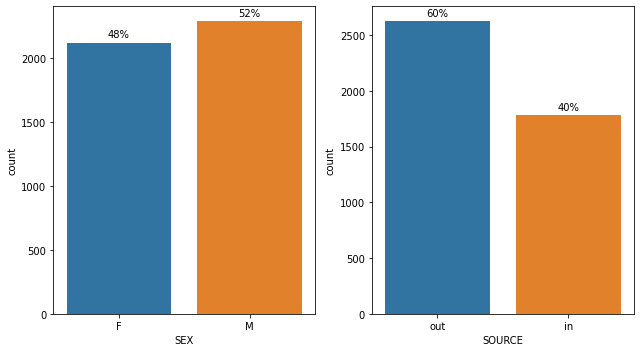

In [ ]:
# Check plotting for features of services categoricals
features = cats
plt.figure(figsize=(9, 5))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    ax = sns.countplot(data=dfpatient,
                       x=features[i])

    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
    plt.tight_layout()

1. The ratio on gender is about 52/48
2. Patient who has In care is about 40% and patient Out care is about 60%

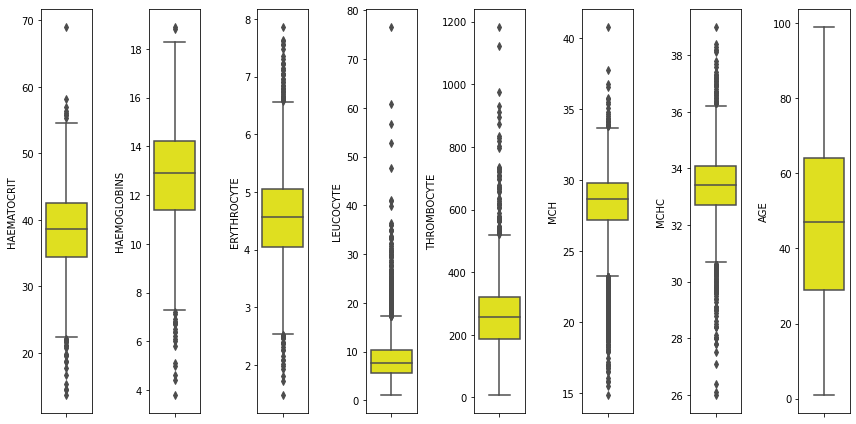

In [ ]:
# Check plotting for features of numericals
plt.figure(figsize=(12, 6))
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=dfpatient[features[i]], color='yellow')
    plt.tight_layout()

1. Column `HAEMATOCRIT`, `HAEMOGLOBINS`, `ERYTHROCYTE`, `MCH` and `MCHC` have handful outliers. But, the outliers are still "normal" (not too extreme). I.e. no need to drop them
2. Column `LEUCOCYTE` and `THROMBOCYTE` have handful outlier and the data containts non-sencial values. So, drop them

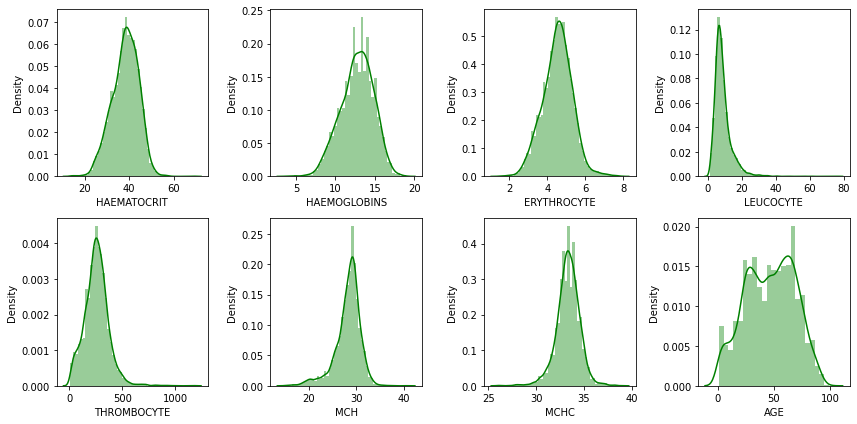

In [ ]:
# Check distibution for features of numericals
plt.figure(figsize=(12, 6))
features = nums
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.distplot(x = dfpatient[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

1. Column `LEUCOCYTE` and `THROMBOCYTE` has positive skew
2. All column, except column `LUECOCYTE` and `THROMBOCYTE` has a symmetrical distribution

##  Bivariate / Multivariate Analysis

In [ ]:
dfpatient.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


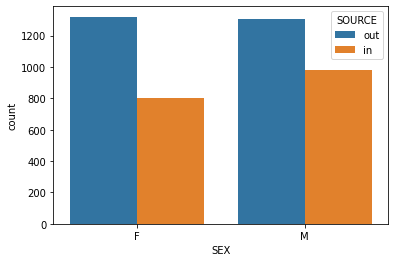

In [ ]:
# SEX affect SOURCE?
sns.countplot(data=dfpatient,
            x='SEX',
            hue='SOURCE')

1. Let's say `SEX` = F, means Female, and `SEX` = M, means Male
2. We can say that, patient with gender male is more likely to be patient In care

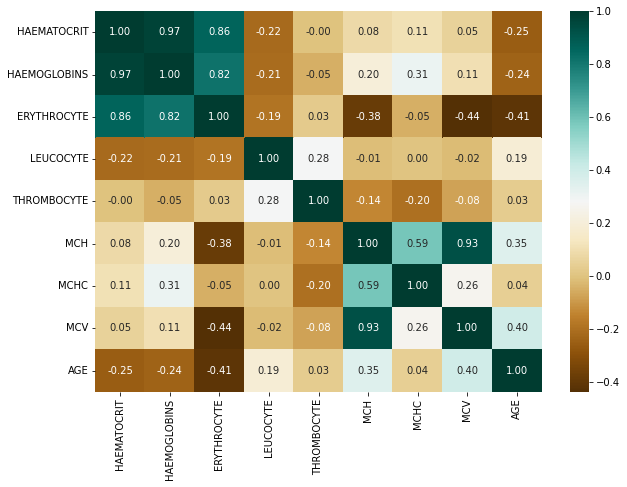

In [ ]:
# Check correlation heatmap
correlation = dfpatient.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='BrBG')

1. `HAEMATOCRIT`, `HAEMOGLOBINS`, `ERYTHROCYTE`, `MCH` and `MCV` are highly correlated each other
2. Choose either of them for modelling because they are redundant

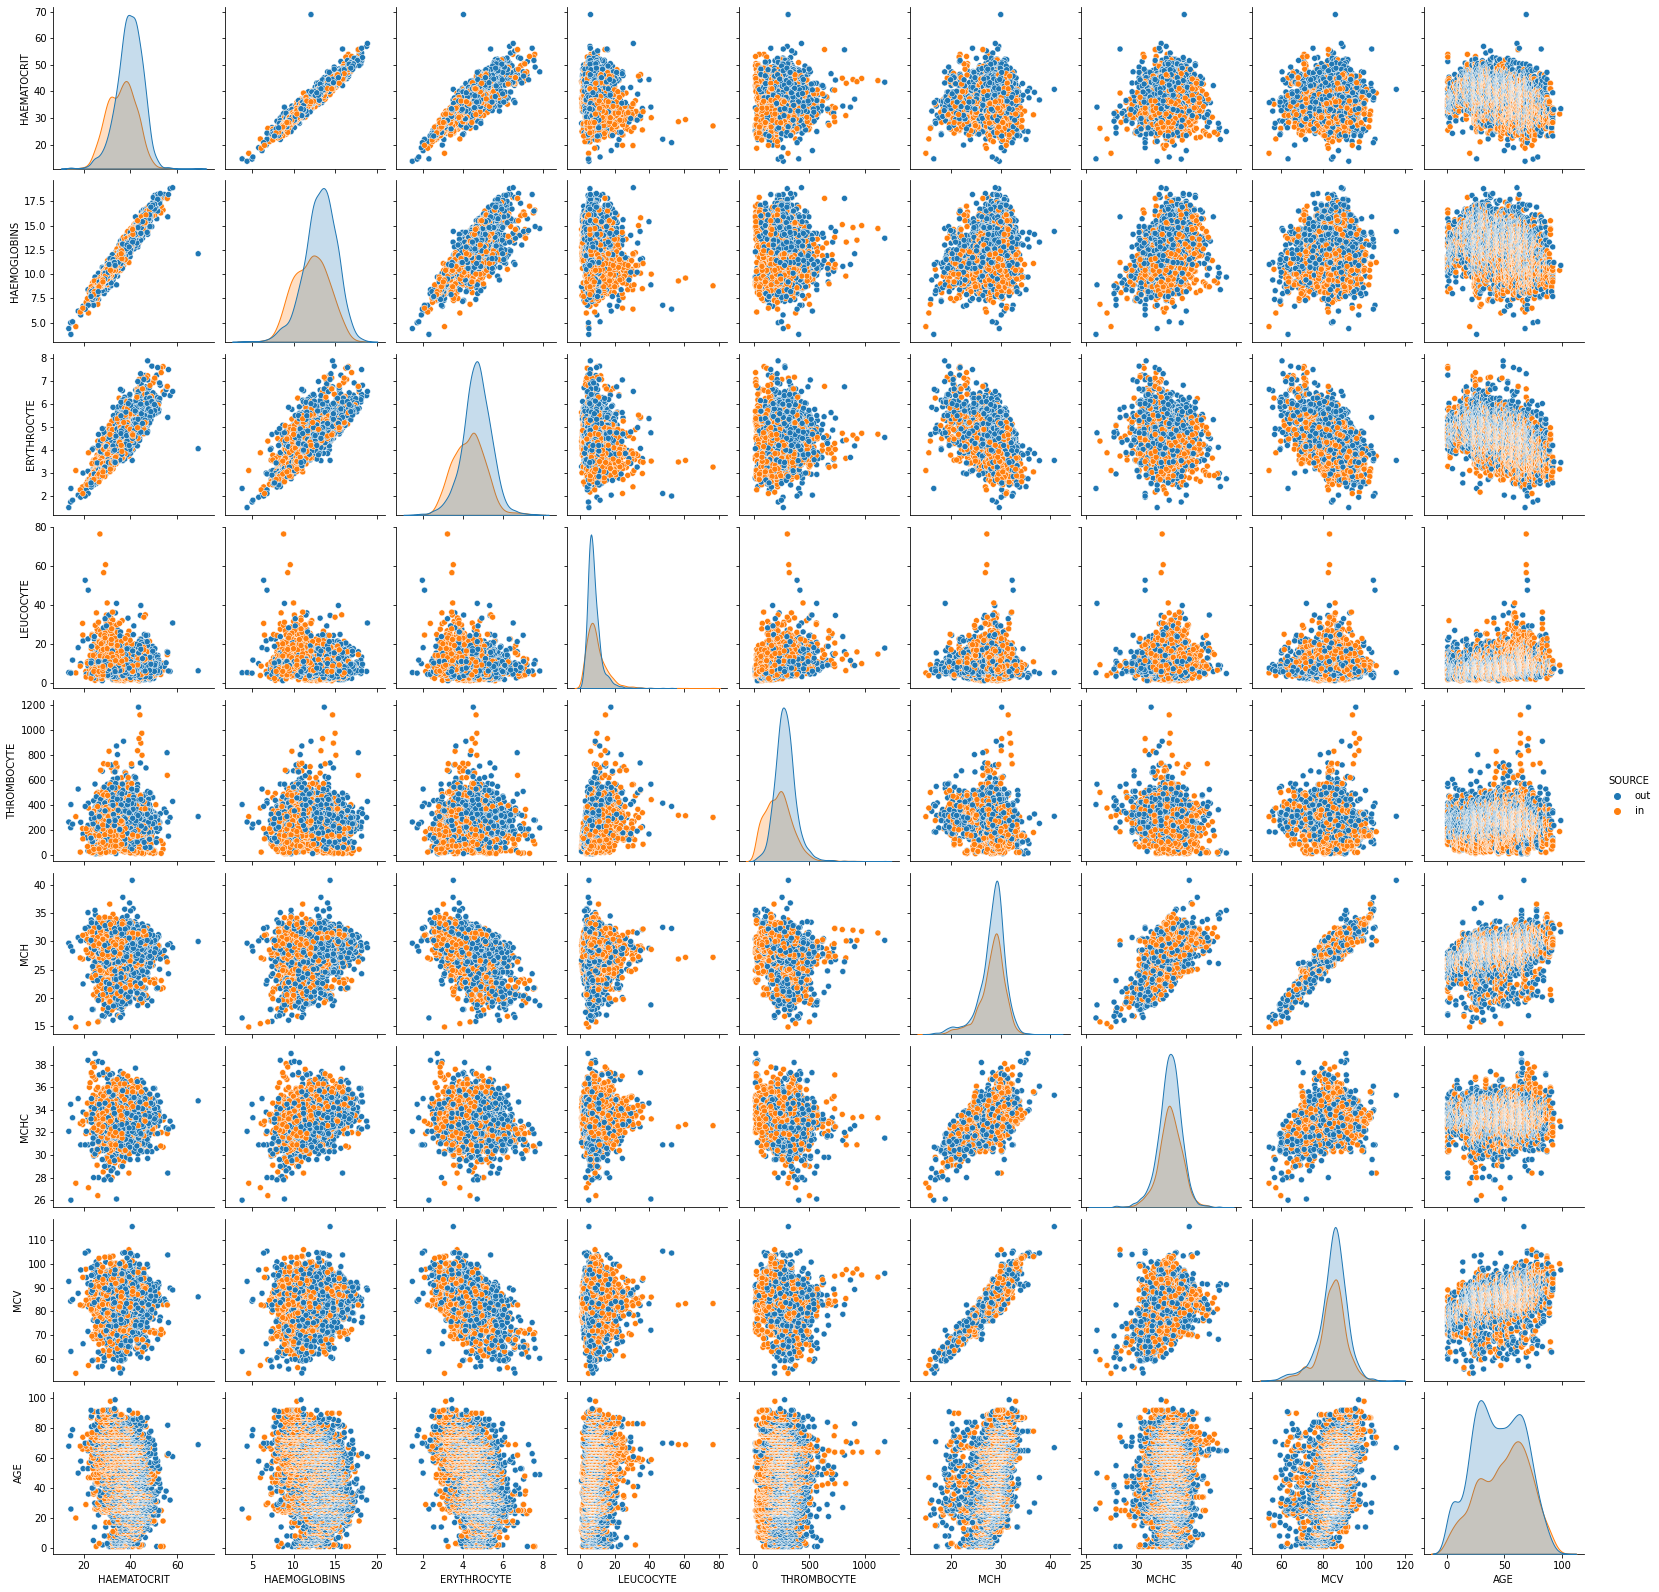

In [ ]:
#Pair Plot
sns.pairplot(dfpatient, hue='SOURCE')

1. `HAEMOTOCRIT`, `HAEMOGLOBINS`, `ERYTHROCYTE`, `LEUCOCYTE` and `THROMBOCYTE` features are lesser in In care patients
2. `MCH`, `MCHV` and `MCV` are less informative to differentiate classes
3. Patient who are 45-80 years old tend to In care

# EDA Conlusion

1. The data does not contain major issues. There are no NaN values and duplicated rows
2. Overall, the minimum and maximum values ​​make sense for each column
3. All column, except column `LUECOCYTE` has a symmetrical distribution
4. The `LEUCOCYTE` columns show a skew distribution, because mean > median
5. There is no column has a very large unique or more than 15 unique value, it's good
6. From the barplot we can see outlier in `HAEMATOCRI`, `HAEMOGLOBINS`, `ERYTHROCYTE`, `MCH` and `MCHC` have handful outliers. But, the outliers are still "normal" (not too extreme). I.e. no need to drop them. And, in column `LEUCOCYTE` and `THROMBOCYTE` have handful outliers. But, the data containts non-sencial values. So, drop them
7. From KDE plot we can see all column, except `LUECOCYTE` and `THROMBOCYTE` has a symmetrical distribution
8. From barcharts of `SOURCE` and `SEX`, we can say that, patient with gender male is more likely to be patient In care
9. From correlation heatmap, We can see that `HAEMATOCRIT` is correlated with `HAEMOGLOBINS` and `ERYTHROCYTE`. And also, `MCH` is correlated with `MCV`. So, we can choose either of them for modelling.
10. From pairplot we can see in `HAEMOTOCRIT`, `HAEMOGLOBINS`, `ERYTHROCYTE`, `LEUCOCYTE` and `THROMBOCYTE` features are lesser for In care patients

# Modelling Machine Learning

## Data Preprocessing

### Label Encoding

In [ ]:
dfpatient.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


In [ ]:
# Apply Label Encoding for 2 Values
dfpatient['SEX'] = dfpatient['SEX'].astype('category').cat.codes
dfpatient['SOURCE'] = dfpatient['SOURCE'].astype('category').cat.codes
dfpatient.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0,1
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,0,1
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,0,1
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,0,1
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,1,1


### Outlier Handling

In [ ]:
# Check Features
features  = list(dfpatient)[:]
features

['HAEMATOCRIT',
 'HAEMOGLOBINS',
 'ERYTHROCYTE',
 'LEUCOCYTE',
 'THROMBOCYTE',
 'MCH',
 'MCHC',
 'MCV',
 'AGE',
 'SEX',
 'SOURCE']

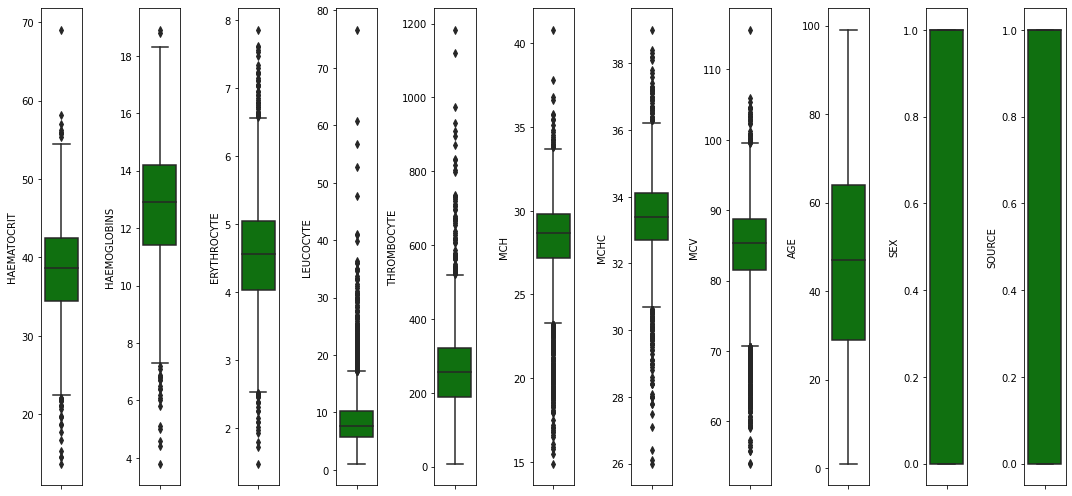

In [ ]:
# Use Boxplot
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 11, i+1)
    sns.boxplot(y=features[i],data=dfpatient,color='green')
    plt.tight_layout()

We will handling `LEUCOCYTE` and `THROMBOCYTE` outlier only, while the others are being kept

In [ ]:
# Handling Outlier
outlier_features = ['LEUCOCYTE','THROMBOCYTE']
for i in outlier_features:
    dfpatient[i] = np.log(dfpatient[i]+1)

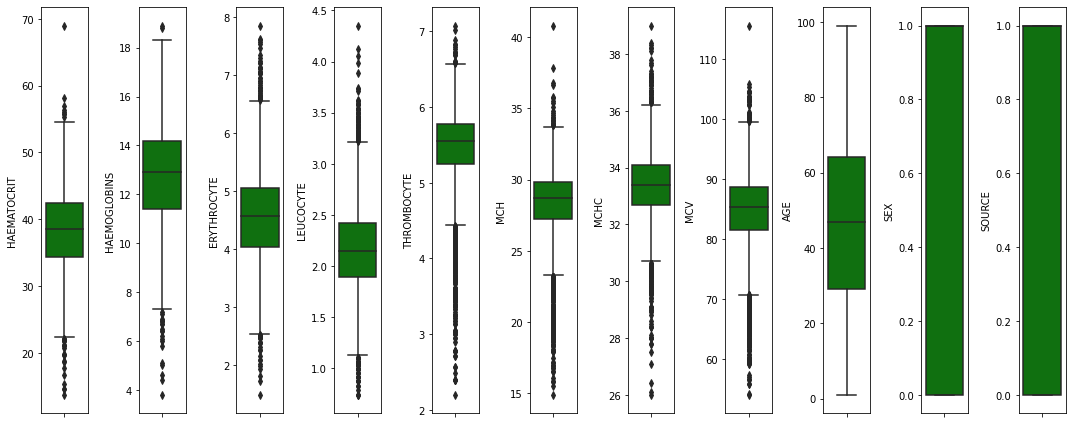

In [ ]:
# Check feature after handle outlier
plt.figure(figsize=(15, 6))
for i in range(0, len(features)):
    plt.subplot(1, 11, i+1)
    sns.boxplot(y=features[i],data=dfpatient,color='green')
    plt.tight_layout()

Success handle outlier

### Multicolinearity Handling

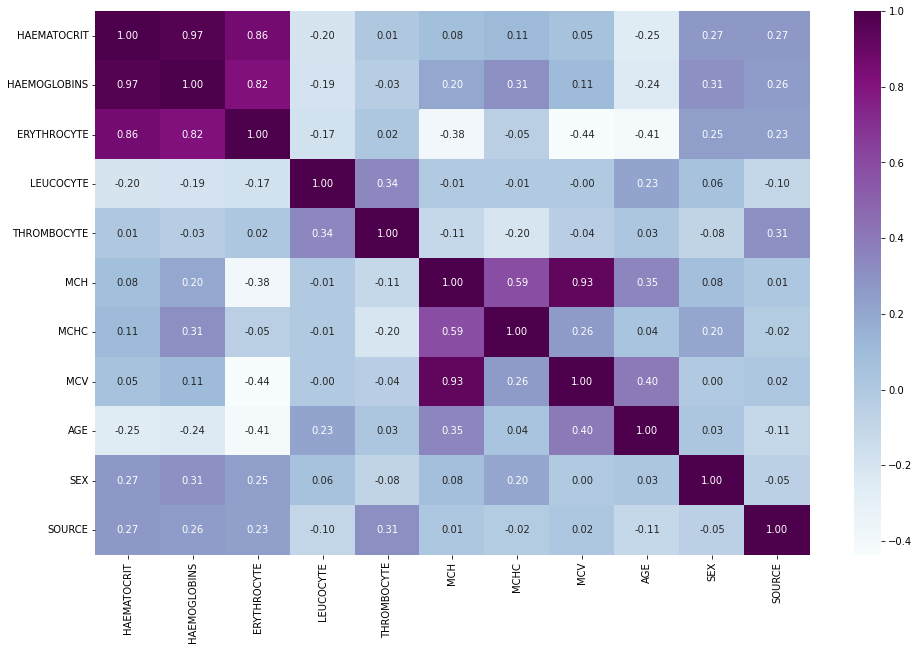

In [ ]:
corr_= dfpatient.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

In [ ]:
df = dfpatient.drop(['HAEMOGLOBINS', 'ERYTHROCYTE', 'MCH'], axis=1)
df.head()

,HAEMATOCRIT,LEUCOCYTE,THROMBOCYTE,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,1.987874,5.739793,33.6,75.5,1,0,1
1,43.5,2.617396,5.814131,34.0,80.7,1,0,1
2,33.5,2.653242,5.723585,33.7,70.7,1,0,1
3,39.1,2.442347,5.905362,35.0,78.5,1,0,1
4,30.9,3.139833,5.811141,32.0,73.0,1,1,1


## Split Data

In [ ]:
# split the data 
from sklearn.model_selection import train_test_split

X = df.drop(columns='SOURCE').to_numpy()
y = df[['SOURCE']].to_numpy()
y = y.reshape(len(y),) # sklean formatting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# It's important to choose the right metric when doing classification
df['SOURCE'].value_counts()

1    2628
0    1784
Name: SOURCE, dtype: int64

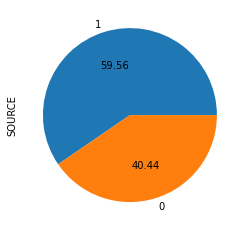

In [ ]:
df['SOURCE'].value_counts().plot.pie(autopct='%.2f')

It is known that patient Out care has 60% and In care has 40% in dataset. Therefore, this class distribution is `IMBALANCE`, so need NOT to use `accuracy`. Use recall (sensitivity) instead!

## Modeling

### K-NN Classification

In [ ]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.504016,7
1,{'n_neighbors': 3},0.741862,3
2,{'n_neighbors': 4},0.618694,6
3,{'n_neighbors': 5},0.761220,2
4,{'n_neighbors': 6},0.668727,5
5,{'n_neighbors': 7},0.778685,1
6,{'n_neighbors': 8},0.710249,4


In [ ]:
# what if we also want to tune "weights" hyperparameter
# "uniform": standard measurement
# "distance": closer neighbor has stronger influence
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

# now we use recall (sensitivity) as metric
knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='recall')

In [ ]:
# the results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
10,"{'n_neighbors': 7, 'weights': 'uniform'}",0.778685,1
13,"{'n_neighbors': 8, 'weights': 'distance'}",0.776315,2
11,"{'n_neighbors': 7, 'weights': 'distance'}",0.770662,3
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.765469,4
6,"{'n_neighbors': 5, 'weights': 'uniform'}",0.761220,5
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.757915,6
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.741862,7
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.739031,8
5,"{'n_neighbors': 4, 'weights': 'distance'}",0.738560,9
12,"{'n_neighbors': 8, 'weights': 'uniform'}",0.710249,10


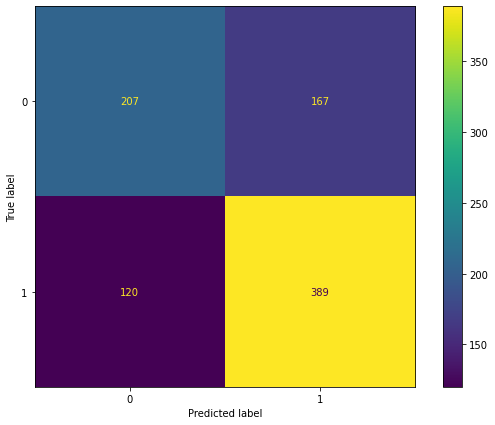

In [ ]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

## Evaluation

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.55      0.59       374
           1       0.70      0.76      0.73       509

    accuracy                           0.67       883
   macro avg       0.67      0.66      0.66       883
weighted avg       0.67      0.67      0.67       883



## Random Forest

### Split Data

In [ ]:
# the usual splitting 
from sklearn.model_selection import train_test_split

X = df.drop(columns='SOURCE').to_numpy()
y = df[['SOURCE']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Modeling

In [ ]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 10.2 s, sys: 0 ns, total: 10.2 s
Wall time: 10.2 s


It takes > 5 seconds to finish

In [ ]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
2,"{'max_depth': 1, 'n_estimators': 30}",0.980178,1
0,"{'max_depth': 1, 'n_estimators': 10}",0.977817,2
3,"{'max_depth': 1, 'n_estimators': 40}",0.972625,3
4,"{'max_depth': 1, 'n_estimators': 50}",0.971680,4
1,"{'max_depth': 1, 'n_estimators': 20}",0.969321,5
5,"{'max_depth': 2, 'n_estimators': 10}",0.939595,6
8,"{'max_depth': 2, 'n_estimators': 40}",0.926852,7
7,"{'max_depth': 2, 'n_estimators': 30}",0.926384,8
6,"{'max_depth': 2, 'n_estimators': 20}",0.924496,9
10,"{'max_depth': 3, 'n_estimators': 10}",0.919770,10


If we want to speed up the training process, we may use RandomizedSearchCV

In [ ]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

CPU times: user 4.8 s, sys: 0 ns, total: 4.8 s
Wall time: 5.96 s


Now it only takes way less seconds (compared to >4 seconds when using the full GridSearchCV)

In [ ]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,"{'n_estimators': 30, 'max_depth': 1}",0.980178,1
6,"{'n_estimators': 10, 'max_depth': 1}",0.977817,2
2,"{'n_estimators': 20, 'max_depth': 1}",0.969321,3
5,"{'n_estimators': 30, 'max_depth': 2}",0.926384,4
7,"{'n_estimators': 50, 'max_depth': 2}",0.915534,5
0,"{'n_estimators': 40, 'max_depth': 3}",0.905144,6
9,"{'n_estimators': 10, 'max_depth': 4}",0.892394,7
3,"{'n_estimators': 20, 'max_depth': 5}",0.883438,8
4,"{'n_estimators': 50, 'max_depth': 4}",0.883438,8
8,"{'n_estimators': 30, 'max_depth': 5}",0.880606,10


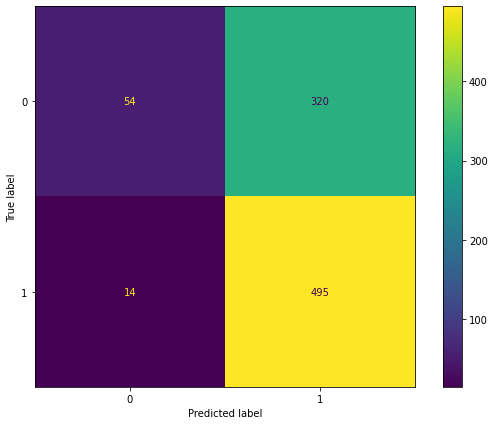

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

### Evaluation

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.14      0.24       374
           1       0.61      0.97      0.75       509

    accuracy                           0.62       883
   macro avg       0.70      0.56      0.50       883
weighted avg       0.69      0.62      0.53       883



So much better than our previous K-NN model!